<a href="https://colab.research.google.com/github/samansadeghii/CDC-BRFSS-Behavioral-Risk-Factor-Surveillance-System-/blob/main/CDC_BRFSS_(Behavioral_Risk_Factor_Surveillance_System).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv to Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv


In [5]:
import os
os.listdir()


['.config',
 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv',
 'sample_data']

In [6]:
import pandas as pd

df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [7]:
print(df.columns)


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Sex', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [9]:
obesity = df[(df['Topic'] == 'Obesity / Weight Status') &
             (df['Question'].str.contains('Percent of adults aged 18 years and older who have obesity'))]


In [10]:
activity = df[(df['Topic'] == 'Physical Activity') &
              (df['Question'].str.contains('Percent of adults who achieve at least 150 min'))]


In [11]:
obesity_data = obesity[['LocationDesc', 'Data_Value']].rename(columns={'Data_Value': 'Obesity'})
activity_data = activity[['LocationDesc', 'Data_Value']].rename(columns={'Data_Value': 'Physical_Activity'})


In [12]:
merged = pd.merge(obesity_data, activity_data, on='LocationDesc')
merged = merged.dropna()
merged.head()


,LocationDesc,Obesity,Physical_Activity


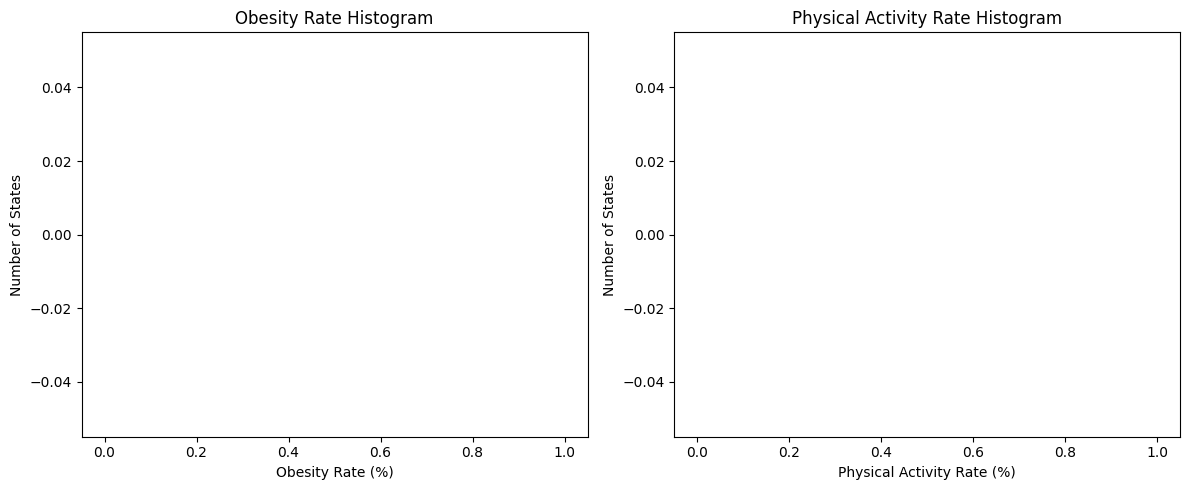

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(merged['Obesity'], bins=10)
plt.title('Obesity Rate Histogram')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Number of States')

plt.subplot(1,2,2)
plt.hist(merged['Physical_Activity'], bins=10)
plt.title('Physical Activity Rate Histogram')
plt.xlabel('Physical Activity Rate (%)')
plt.ylabel('Number of States')

plt.tight_layout()
plt.show()


In [20]:
print(merged.shape)
print(merged.head(10))


(0, 3)
Empty DataFrame
Columns: [LocationDesc, Obesity, Physical_Activity]
Index: []


In [21]:
print(obesity[['LocationDesc', 'Data_Value']].head(10))
print(activity[['LocationDesc', 'Data_Value']].head(10))


   LocationDesc  Data_Value
0        Alaska        23.3
1        Alaska        35.5
3        Alaska        29.5
5        Alaska        28.0
11       Alaska        26.7
14       Alaska        25.8
31       Alaska         NaN
33       Alaska        31.5
34       Alaska        30.9
44       Alaska        33.4
Empty DataFrame
Columns: [LocationDesc, Data_Value]
Index: []


In [22]:
print(df['Topic'].unique())
print(df['Question'].unique())


['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']
['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who engage in no leisure-time physical activity'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensit

In [23]:
obesity = df[df['Question'].str.contains('obesity', case=False, na=False)]
activity = df[df['Question'].str.contains('physical activity', case=False, na=False)]


In [24]:
merged = pd.merge(obesity[['LocationDesc', 'Data_Value']].rename(columns={'Data_Value':'Obesity'}),
                  activity[['LocationDesc', 'Data_Value']].rename(columns={'Data_Value':'Physical_Activity'}),
                  on='LocationDesc')
print(merged.shape)
print(merged.head(10))


(16848160, 3)
  LocationDesc  Obesity  Physical_Activity
0       Alaska     23.3               21.7
1       Alaska     23.3                NaN
2       Alaska     23.3                NaN
3       Alaska     23.3               17.3
4       Alaska     23.3               19.2
5       Alaska     23.3               56.2
6       Alaska     23.3                NaN
7       Alaska     23.3               30.1
8       Alaska     23.3               33.8
9       Alaska     23.3               67.2


In [25]:
print(merged.shape)
print(merged.head())


(16848160, 3)
  LocationDesc  Obesity  Physical_Activity
0       Alaska     23.3               21.7
1       Alaska     23.3                NaN
2       Alaska     23.3                NaN
3       Alaska     23.3               17.3
4       Alaska     23.3               19.2


In [26]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(merged['Obesity'], merged['Physical_Activity'])
print(f"Pearson correlation coefficient: {corr:.2f}")
print(f"p-value: {p_value:.4f}")


Pearson correlation coefficient: nan
p-value: nan


In [27]:
print(merged[['Obesity', 'Physical_Activity']])
print(merged[['Obesity', 'Physical_Activity']].dropna())
print(merged[['Obesity', 'Physical_Activity']].dropna().shape)


          Obesity  Physical_Activity
0            23.3               21.7
1            23.3                NaN
2            23.3                NaN
3            23.3               17.3
4            23.3               19.2
...           ...                ...
16848155     40.1               28.5
16848156     40.1               31.7
16848157     40.1               32.4
16848158     40.1               22.5
16848159     40.1               34.7

[16848160 rows x 2 columns]
          Obesity  Physical_Activity
0            23.3               21.7
3            23.3               17.3
4            23.3               19.2
5            23.3               56.2
7            23.3               30.1
...           ...                ...
16848155     40.1               28.5
16848156     40.1               31.7
16848157     40.1               32.4
16848158     40.1               22.5
16848159     40.1               34.7

[13692556 rows x 2 columns]
(13692556, 2)


In [28]:
from scipy.stats import pearsonr

clean_data = merged[['Obesity', 'Physical_Activity']].dropna()

corr, p_value = pearsonr(clean_data['Obesity'], clean_data['Physical_Activity'])
print(f"Pearson correlation coefficient: {corr:.2f}")
print(f"p-value: {p_value:.4f}")


Pearson correlation coefficient: -0.02
p-value: 0.0000


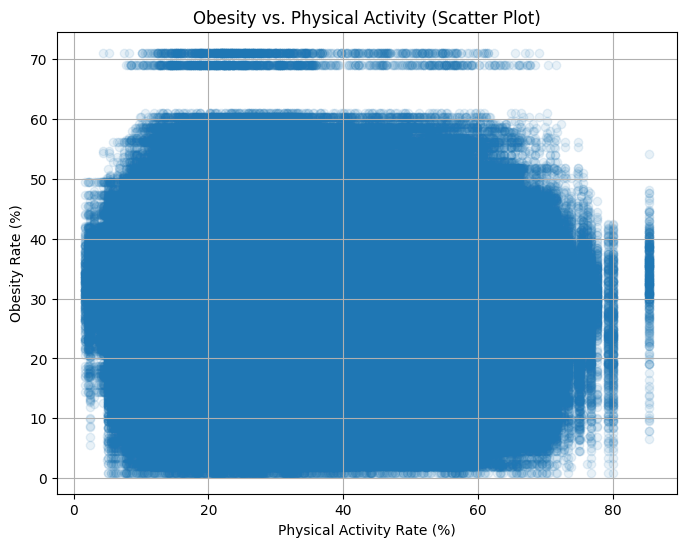

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(clean_data['Physical_Activity'], clean_data['Obesity'], alpha=0.1)
plt.xlabel('Physical Activity Rate (%)')
plt.ylabel('Obesity Rate (%)')
plt.title('Obesity vs. Physical Activity (Scatter Plot)')
plt.grid(True)
plt.show()


In [30]:
print(df['YearStart'].unique())


[2011 2016 2012 2014 2015 2013 2017 2018 2019 2020 2021 2022 2023]


In [31]:
df_year = df[df['YearStart'] == 2015]
print(df_year.shape)
print(df_year.head())


(10584, 33)
       YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
7623        2015     2015           HI       Hawaii      BRFSS   
7950        2015     2015           UT         Utah      BRFSS   
29377       2015     2015           AK       Alaska      BRFSS   
29378       2015     2015           AK       Alaska      BRFSS   
29379       2015     2015           AK       Alaska      BRFSS   

                         Class                         Topic  \
7623         Physical Activity  Physical Activity - Behavior   
7950         Physical Activity  Physical Activity - Behavior   
29377  Obesity / Weight Status       Obesity / Weight Status   
29378  Obesity / Weight Status       Obesity / Weight Status   
29379  Obesity / Weight Status       Obesity / Weight Status   

                                                Question  Data_Value_Unit  \
7623   Percent of adults who engage in muscle-strengt...           2015.0   
7950   Percent of adults who engage in no leisure-ti

In [32]:
obesity = df_year[(df_year['Topic'] == 'Obesity / Weight Status') &
                  (df_year['Question'].str.contains('Percent of adults aged 18 years and older who have obesity'))]

activity = df_year[(df_year['Topic'] == 'Physical Activity') &
                   (df_year['Question'].str.contains('Percent of adults who achieve at least 150 min'))]


In [33]:
obesity_data = obesity[['LocationDesc', 'Data_Value']].rename(columns={'Data_Value': 'Obesity'})
activity_data = activity[['LocationDesc', 'Data_Value']].rename(columns={'Data_Value': 'Physical_Activity'})

merged = pd.merge(obesity_data, activity_data, on='LocationDesc').dropna()
print(merged.shape)
print(merged.head())


(0, 3)
Empty DataFrame
Columns: [LocationDesc, Obesity, Physical_Activity]
Index: []


In [34]:
from scipy.stats import pearsonr

if merged.shape[0] >= 2:
    corr, p_value = pearsonr(merged['Obesity'], merged['Physical_Activity'])
    print(f"Pearson correlation coefficient: {corr:.2f}")
    print(f"p-value: {p_value:.4f}")
else:
    print("Not enough data to calculate Pearson correlation.")


Not enough data to calculate Pearson correlation.


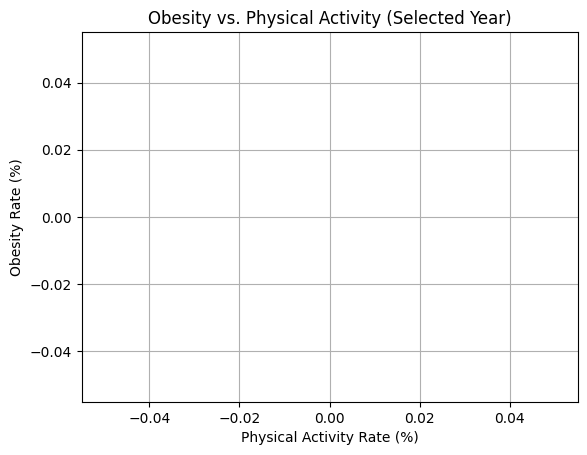

In [35]:
import matplotlib.pyplot as plt

plt.scatter(merged['Physical_Activity'], merged['Obesity'])
plt.xlabel('Physical Activity Rate (%)')
plt.ylabel('Obesity Rate (%)')
plt.title('Obesity vs. Physical Activity (Selected Year)')
plt.grid(True)
plt.show()


In [36]:
print(df[df['LocationDesc'] == 'California']['YearStart'].unique())


[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [37]:
df_ca = df[(df['LocationDesc'] == 'California') & (df['YearStart'] == 2015)]
print(df_ca.shape)
print(df_ca.head())


(196, 33)
       YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
30165       2015     2015           CA   California      BRFSS   
30166       2015     2015           CA   California      BRFSS   
30167       2015     2015           CA   California      BRFSS   
30168       2015     2015           CA   California      BRFSS   
30170       2015     2015           CA   California      BRFSS   

                         Class                         Topic  \
30165  Obesity / Weight Status       Obesity / Weight Status   
30166  Obesity / Weight Status       Obesity / Weight Status   
30167  Obesity / Weight Status       Obesity / Weight Status   
30168        Physical Activity  Physical Activity - Behavior   
30170        Physical Activity  Physical Activity - Behavior   

                                                Question  Data_Value_Unit  \
30165  Percent of adults aged 18 years and older who ...           2015.0   
30166  Percent of adults aged 18 years and older who .

In [39]:
obesity = df_ca[(df_ca['Topic'] == 'Obesity / Weight Status') &
                (df_ca['Question'].str.contains('Percent of adults aged 18 years and older who have obesity', na=False))]

activity = df_ca[(df_ca['Topic'] == 'Physical Activity') &
                 (df_ca['Question'].str.contains('Percent of adults who achieve at least 150 min', na=False))]


In [40]:
obesity_value = obesity['Data_Value'].values
activity_value = activity['Data_Value'].values

print('Obesity:', obesity_value)
print('Physical Activity:', activity_value)


Obesity: [22.8 25.3 27.4 15.1 29.5 27.7 24.6 22.2 31.3 26.6 30.8 19.1 30.2 24.3
 33.9 25.4 19.6 26.6 10.1  nan 26.1 13.6 28.5 25.1 26.  24.2 27.5 23.7]
Physical Activity: []


In [41]:
if len(obesity_value) > 0 and len(activity_value) > 0:
    print(f"Obesity: {obesity_value[0]}")
    print(f"Physical Activity: {activity_value[0]}")
else:
    print("Data not found for this year and state.")


Data not found for this year and state.


In [42]:
years = df[df['LocationDesc'] == 'California']['YearStart'].unique()

obesity_list = []
activity_list = []
year_list = []

for year in years:
    temp = df[(df['LocationDesc'] == 'California') & (df['YearStart'] == year)]
    ob = temp[(temp['Topic'] == 'Obesity / Weight Status') &
              (temp['Question'].str.contains('Percent of adults aged 18 years and older who have obesity', na=False))]
    ac = temp[(temp['Topic'] == 'Physical Activity') &
              (temp['Question'].str.contains('Percent of adults who achieve at least 150 min', na=False))]
    if (not ob.empty) and (not ac.empty):
        obesity_list.append(ob['Data_Value'].values[0])
        activity_list.append(ac['Data_Value'].values[0])
        year_list.append(year)

import pandas as pd
df_ca_years = pd.DataFrame({
    'Year': year_list,
    'Obesity': obesity_list,
    'Physical_Activity': activity_list
})
print(df_ca_years)


Empty DataFrame
Columns: [Year, Obesity, Physical_Activity]
Index: []


In [43]:
from scipy.stats import pearsonr

if len(df_ca_years) > 1:
    corr, p_value = pearsonr(df_ca_years['Obesity'], df_ca_years['Physical_Activity'])
    print(f"Pearson correlation coefficient: {corr:.2f}")
    print(f"p-value: {p_value:.4f}")
else:
    print("Not enough data to calculate Pearson correlation.")


Not enough data to calculate Pearson correlation.


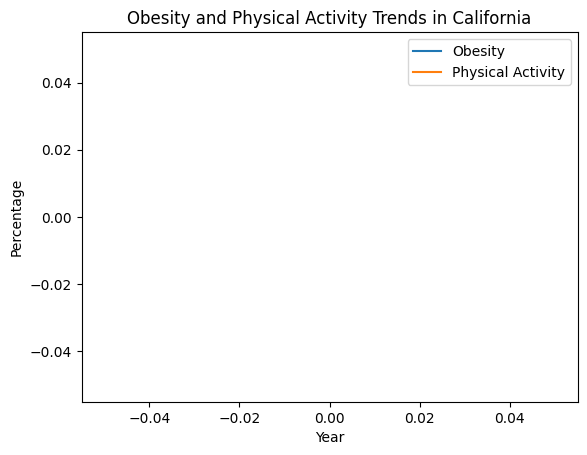

In [44]:
import matplotlib.pyplot as plt

plt.plot(df_ca_years['Year'], df_ca_years['Obesity'], label='Obesity')
plt.plot(df_ca_years['Year'], df_ca_years['Physical_Activity'], label='Physical Activity')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Obesity and Physical Activity Trends in California')
plt.legend()
plt.show()
